In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Import data from csv file.

In [218]:
path_data = r"customer_segments.csv"

In [244]:
df = pd.read_csv(path_data)
df

,id_transaction,product_code,product_description,quantity,timestamp_transaction,unit_price,id_customer,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
2,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
3,536367,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 8:34,5.95,13047.0,United Kingdom
4,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 8:34,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
75224,581585,84879,ASSORTED COLOUR BIRD ORNAMENT,16,12/9/2011 12:31,1.69,15804.0,United Kingdom
75225,581585,23084,RABBIT NIGHT LIGHT,12,12/9/2011 12:31,2.08,15804.0,United Kingdom
75226,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
75227,581585,22113,GREY HEART HOT WATER BOTTLE,4,12/9/2011 12:31,4.25,15804.0,United Kingdom


There is no null value in the dataset, but timestamp_transaction data type needs to be converted.

In [245]:
df['timestamp_transaction'] = pd.to_datetime(df['timestamp_transaction']) 

Calculate the total amount of each transaction.

In [246]:
df['total_amount'] = df['quantity']*df['unit_price']
df

,id_transaction,product_code,product_description,quantity,timestamp_transaction,unit_price,id_customer,country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
2,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
3,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85
4,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85
...,...,...,...,...,...,...,...,...,...
75224,581585,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-12-09 12:31:00,1.69,15804.0,United Kingdom,27.04
75225,581585,23084,RABBIT NIGHT LIGHT,12,2011-12-09 12:31:00,2.08,15804.0,United Kingdom,24.96
75226,581585,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40
75227,581585,22113,GREY HEART HOT WATER BOTTLE,4,2011-12-09 12:31:00,4.25,15804.0,United Kingdom,17.00


Aggregate transactional data at customer level by summing up the total quantity each customer purchased, the average unit price that each customer bought, the total number of transactions made by each customer,  the average timestamp transaction made by each customer.

In [257]:
df.customer_data = df.groupby('id_customer').agg({
    'quantity': 'sum',
    'unit_price': 'mean',
    'id_transaction': 'count',
    'total_amount':'sum',
    'timestamp_transaction':'mean',
    
}).reset_index()
df.customer_data

,id_customer,quantity,unit_price,id_transaction,total_amount,timestamp_transaction
0,12359.0,481,4.410159,63,1559.67,2011-06-11 22:27:42.857143040
1,12362.0,854,3.958866,97,2246.14,2011-08-15 11:45:44.536082432
2,12380.0,635,3.329091,55,1532.27,2011-08-18 19:10:20.727272704
3,12395.0,1287,4.310575,87,1850.58,2011-06-19 10:02:37.241379328
4,12408.0,772,3.086400,50,1752.50,2011-07-01 16:06:15.600000000
...,...,...,...,...,...,...
622,18229.0,1506,2.277273,77,2888.30,2011-07-28 07:15:00.779220736
623,18257.0,612,2.536792,53,1157.90,2011-07-10 03:50:43.018867968
624,18260.0,682,3.131071,56,1208.20,2011-04-10 19:29:46.956521728
625,18272.0,715,2.078852,61,1149.33,2011-07-27 20:02:35.409836032


Standardize the numeric columns quantity, unit price, id_transaction, and total_amount by transforming numeric data to have zero mean and unit variance. Keep the timestamp data unchanged.

In [258]:
scaler = StandardScaler()
numeric_cols = ['quantity', 'unit_price', 'id_transaction','total_amount']
df.customer_data[numeric_cols] = scaler.fit_transform(df.customer_data[numeric_cols])
df.customer_data

,id_customer,quantity,unit_price,id_transaction,total_amount,timestamp_transaction
0,12359.0,-0.263511,0.140749,-0.406409,-0.209900,2011-06-11 22:27:42.857143040
1,12362.0,-0.185915,0.082411,-0.163915,-0.135427,2011-08-15 11:45:44.536082432
2,12380.0,-0.231474,0.001000,-0.463467,-0.212873,2011-08-18 19:10:20.727272704
3,12395.0,-0.095836,0.127876,-0.235237,-0.178340,2011-06-19 10:02:37.241379328
4,12408.0,-0.202973,-0.030372,-0.499128,-0.188981,2011-07-01 16:06:15.600000000
...,...,...,...,...,...,...
622,18229.0,-0.050277,-0.134968,-0.306559,-0.065761,2011-07-28 07:15:00.779220736
623,18257.0,-0.236259,-0.101420,-0.477731,-0.253487,2011-07-10 03:50:43.018867968
624,18260.0,-0.221697,-0.024598,-0.456334,-0.248030,2011-04-10 19:29:46.956521728
625,18272.0,-0.214831,-0.160618,-0.420674,-0.254417,2011-07-27 20:02:35.409836032


Use elbow method to calculate the optimal number of clusters. 

In [259]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.customer_data[numeric_cols])
    inertia.append(kmeans.inertia_)

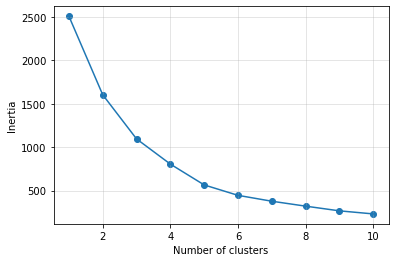

In [260]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.scatter(range(1, 11), inertia)
plt.grid(alpha=0.4)
plt.show()

In [261]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df.customer_data[numeric_cols])
clusters = kmeans.predict(df.customer_data[numeric_cols])

Compute the balance between five clusters.

In [268]:
pd.Series(clusters).value_counts(normalize=True)

0    0.966507
1    0.022329
3    0.006380
2    0.003190
4    0.001595
dtype: float64

Compute the centroids.

In [263]:
centroids = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=df.customer_data[numeric_cols].columns)
df_centroids

,quantity,unit_price,id_transaction,total_amount
0,-0.134358,-0.048598,-0.090604,-0.143554
1,3.614301,0.369526,0.929346,3.672463
2,12.177023,-0.058869,2.385840,12.646042
3,1.630014,0.430666,9.371811,2.254709
4,-0.053605,22.672264,-0.363616,1.268283


Plot the clusters on the graph and compare the relationship between total amount spending and number of transaction.

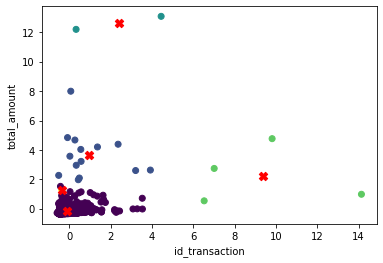

In [266]:
plt.scatter(x=df.customer_data['id_transaction'], y=df.customer_data['total_amount'], c=clusters)
plt.scatter(x=kmeans.cluster_centers_[:, 2], y=kmeans.cluster_centers_[:, 3], marker='X', s=70, color='red')
plt.xlabel('id_transaction')
plt.ylabel('total_amount')
plt.show()

Plot the clusters on three-dimension graph to compare the number of transaction, total amount spending, and unit price for the five cluster.

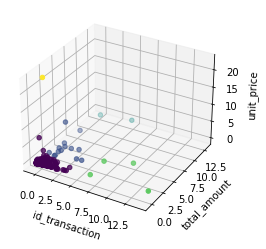

In [267]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.customer_data['id_transaction'], df.customer_data['total_amount'], df.customer_data['unit_price'], c=clusters)
ax.set_xlabel('id_transaction')
ax.set_ylabel('total_amount')
ax.set_zlabel('unit_price')
plt.show()